# Setting Environment and Loading Data

In [1]:
# Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')

# Connecting Google Drive to read data
from google.colab import drive
drive.mount('/content/drive')

import os
project_path = "/content/drive/Dissertation (Order Delivery Prediction)"
os.chdir(project_path)

Mounted at /content/drive


In [3]:
import pandas as pd

# Load the dataset
file_path = 'Train.csv'
data = pd.read_csv(file_path)

# Displaying head of data
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
# Summary of the dataset
print("Summary of the dataset:")
print(data.info())

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB
None


In [5]:
# Renaming columns
data.rename(columns={
    'ID': 'Customer_ID',
    'Warehouse_block': 'Warehouse_Block',
    'Mode_of_Shipment': 'Shipment_Mode',
    'Customer_care_calls': 'Customer_Care_Calls',
    'Customer_rating': 'Customer_Rating',
    'Cost_of_the_Product': 'Product_Cost',
    'Prior_purchases': 'Prior_Purchases',
    'Product_importance': 'Product_Importance',
    'Gender': 'Customer_Gender',
    'Discount_offered': 'Discount_Offered',
    'Weight_in_gms': 'Product_Weight',
    'Reached.on.Time_Y.N': 'Delivered_On_Time'
}, inplace=True)

# Data Analysis

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Set style
sns.set_style('darkgrid')

# Function to plot bar and pie chart for categorical features
def plot_categorical(feature, title, limited=False, n=10):
    print(f"Total unique values in {title}: {len(feature.value_counts())}\n")
    if limited:
        data = feature.value_counts().nlargest(n)
    else:
        data = feature.value_counts()

    print(data)
    categories_num = len(data)

    # Bar plot
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    plt.title(f'{title} - Bar Chart', fontsize=16)
    plt.xticks(rotation=45)
    plot = sns.barplot(x=data.index, y=data.values, edgecolor="white", palette=sns.color_palette("icefire"))
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size=12)

    # Pie chart
    plt.subplot(1, 2, 2)
    plt.title(f'{title} - Pie Chart', fontsize=16)
    labels = data.index
    plt.pie(x=data, autopct="%.1f%%", explode=[0.02] * categories_num, labels=labels, pctdistance=0.5)
    plt.show()

# Function to plot distributions for numerical features
def plot_numerical(feature, title):
    plt.figure(figsize=(10, 6))
    plt.title(f'{title} - Distribution', fontsize=16)
    sns.histplot(feature, kde=True, bins=30)
    plt.show()

Customer_Rating
3    2239
1    2235
4    2189
5    2171
2    2165
Name: count, dtype: int64


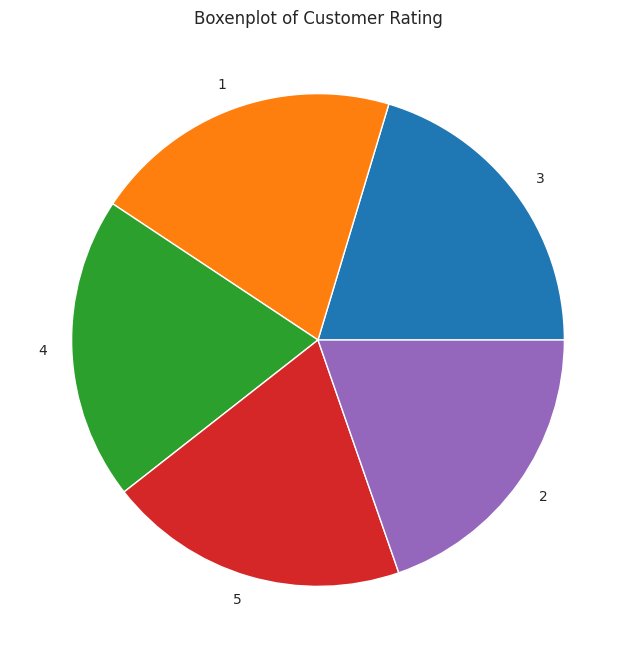

In [20]:
# Customer rating
print(data.Customer_Rating.value_counts())
plt.figure(figsize=(8, 8))
data.Customer_Rating.value_counts().plot(kind="pie")
plt.title('Boxenplot of Customer Rating')
plt.xlabel('')
plt.ylabel('')
plt.show()

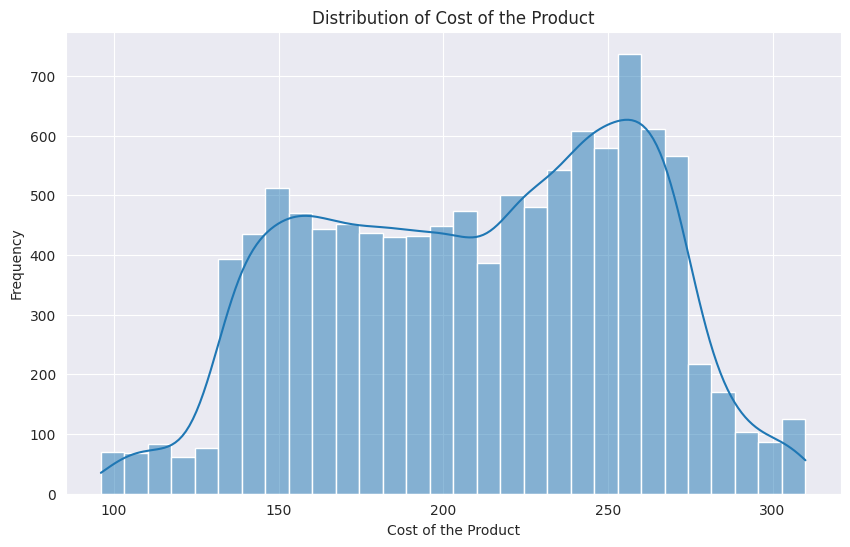

In [8]:
# Cost of the product
plt.figure(figsize=(10, 6))
sns.histplot(data['Product_Cost'], kde=True, bins=30)
plt.title('Distribution of Cost of the Product')
plt.xlabel('Cost of the Product')
plt.ylabel('Frequency')
plt.show()

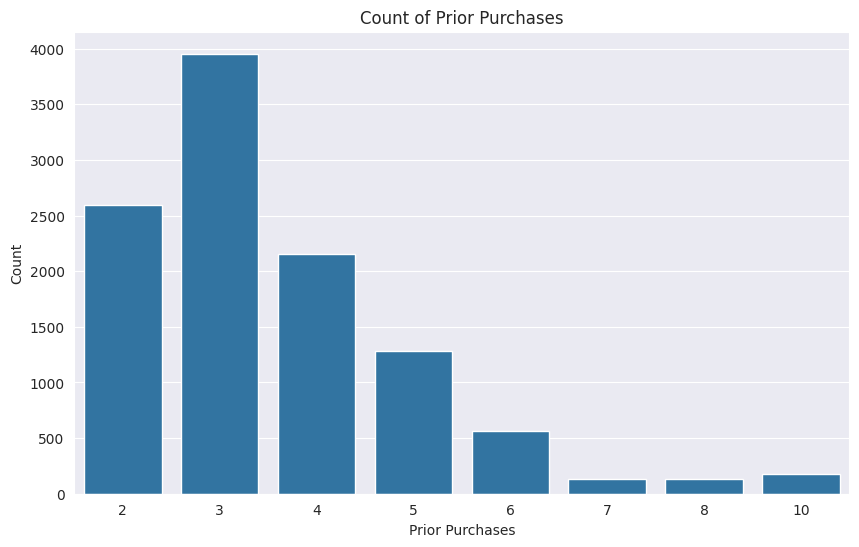

In [9]:
# Prior purchases
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Prior_Purchases')
plt.title('Count of Prior Purchases')
plt.xlabel('Prior Purchases')
plt.ylabel('Count')
plt.show()

Total unique values in Warehouse Block: 5

Warehouse_Block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64


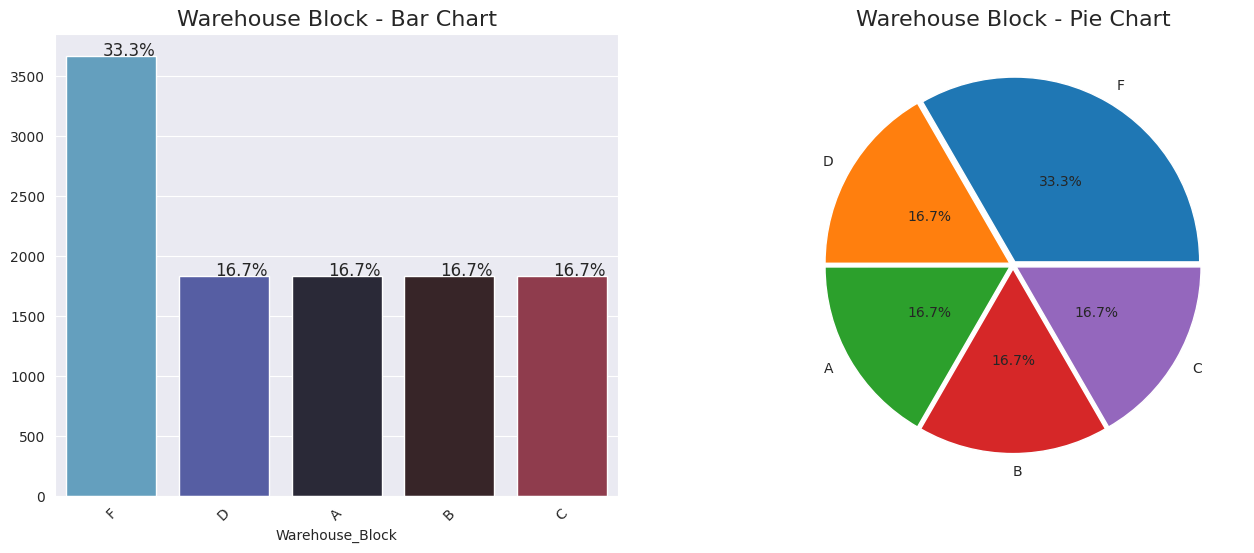

Total unique values in Mode of Shipment: 3

Shipment_Mode
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64


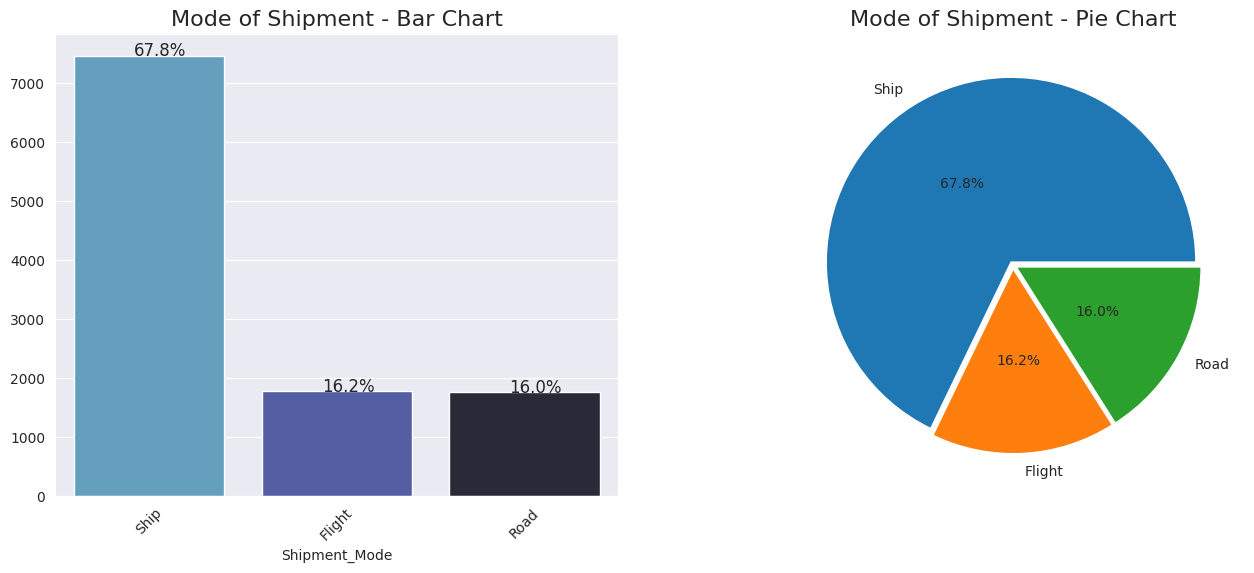

Total unique values in Product Importance: 3

Product_Importance
low       5297
medium    4754
high       948
Name: count, dtype: int64


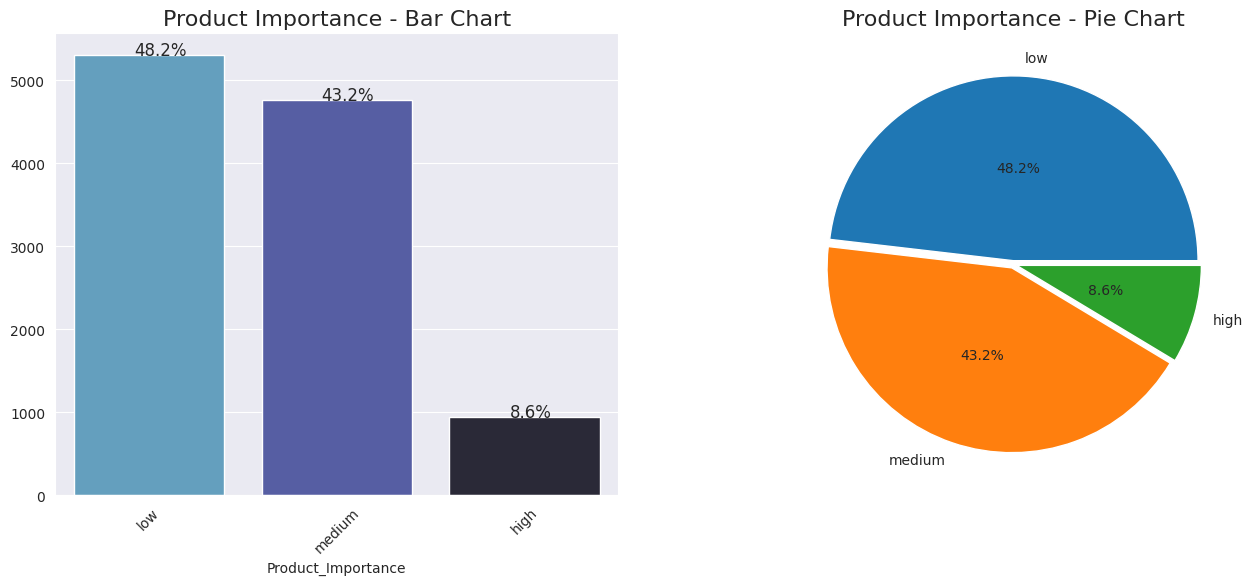

Total unique values in Gender: 2

Customer_Gender
F    5545
M    5454
Name: count, dtype: int64


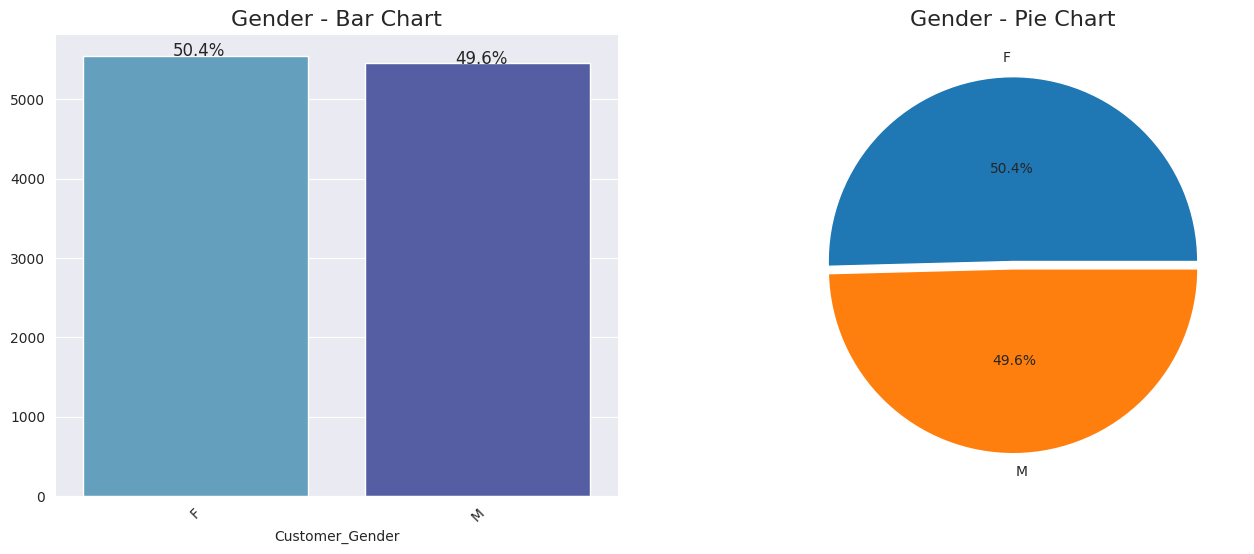

Total unique values in Delivered on Time: 2

Delivered_On_Time
1    6563
0    4436
Name: count, dtype: int64


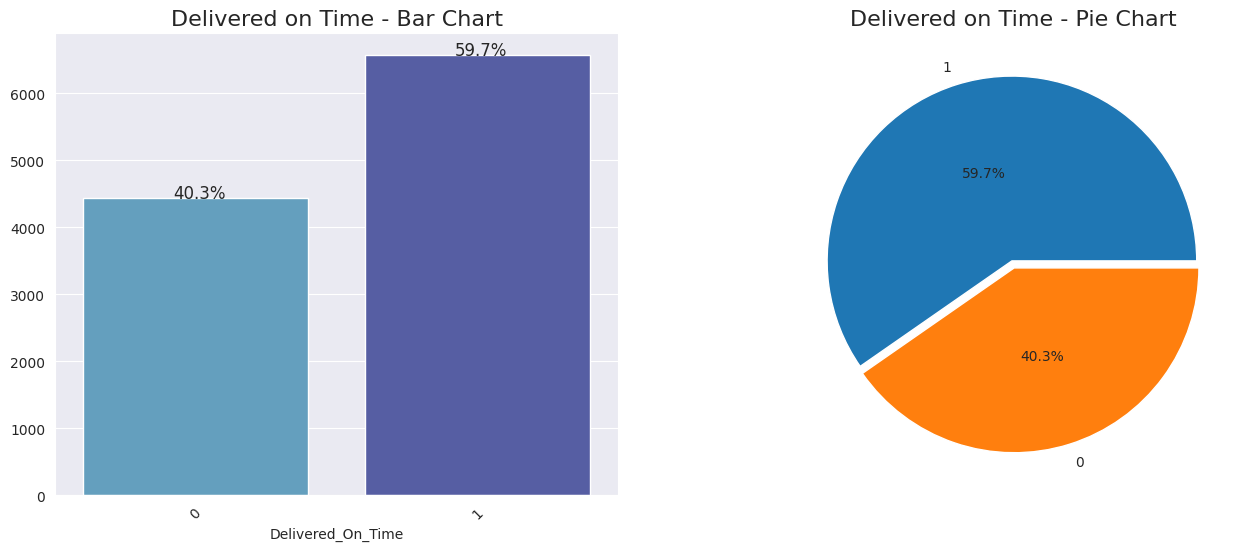

In [22]:
# Plotting categorical features
plot_categorical(data['Warehouse_Block'], 'Warehouse Block')
plot_categorical(data['Shipment_Mode'], 'Mode of Shipment')
plot_categorical(data['Product_Importance'], 'Product Importance')
plot_categorical(data['Customer_Gender'], 'Gender')
plot_categorical(data['Delivered_On_Time'], 'Delivered on Time')

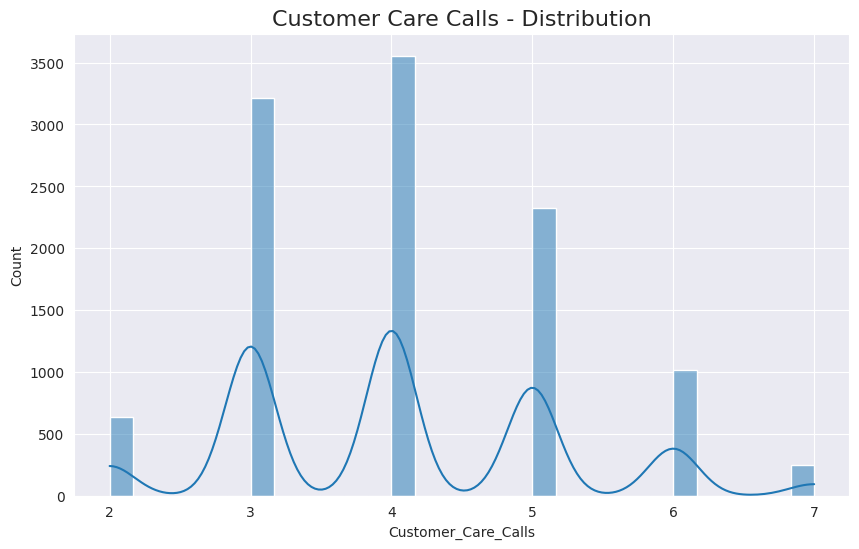

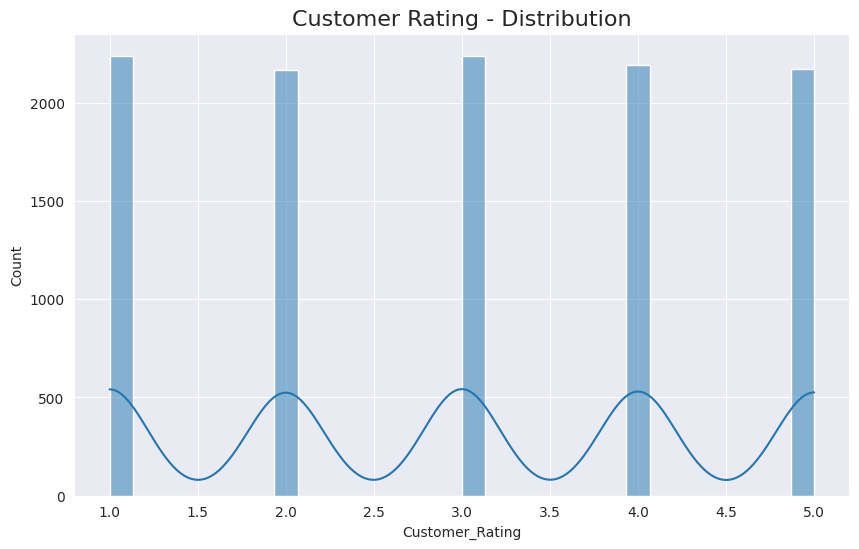

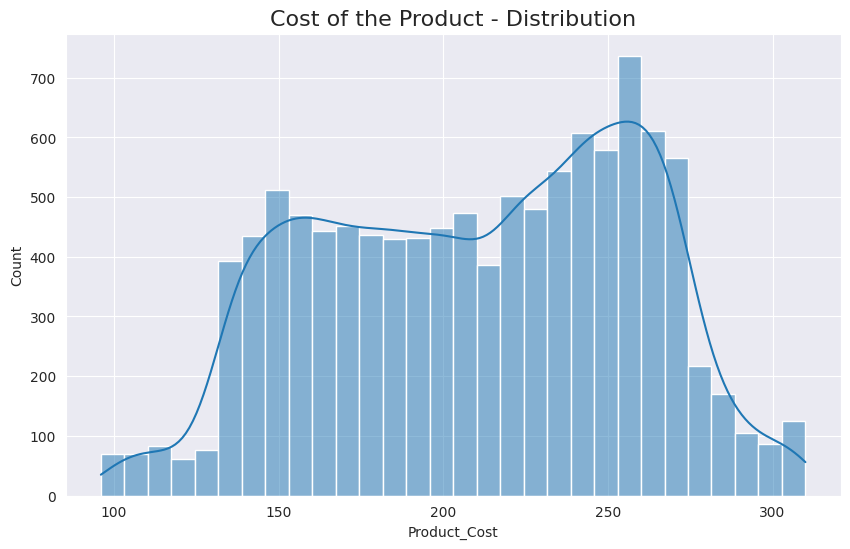

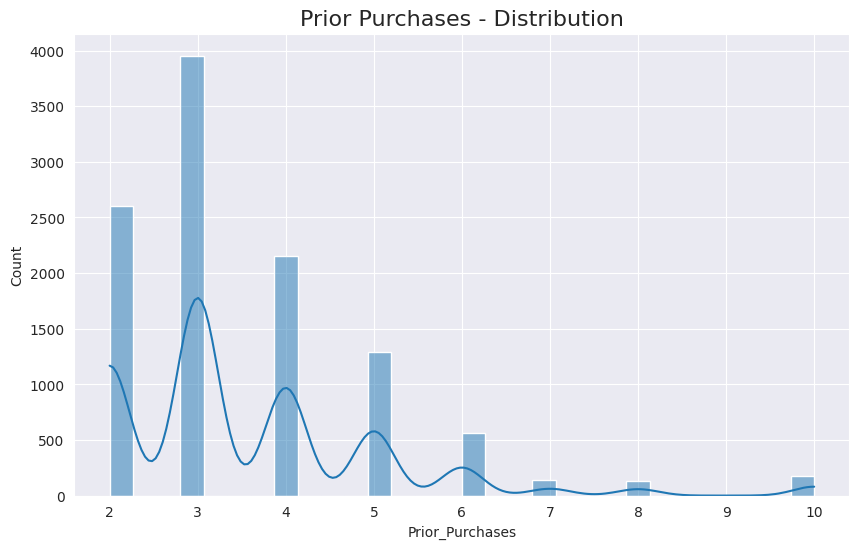

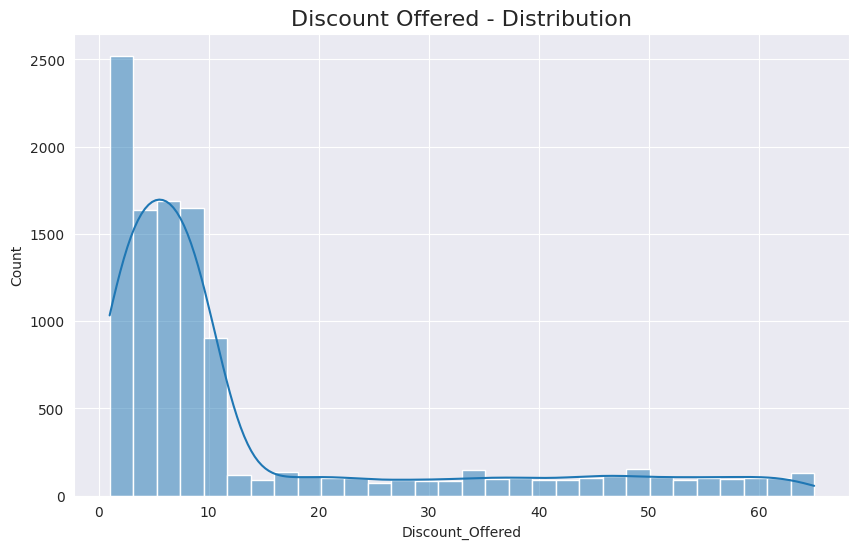

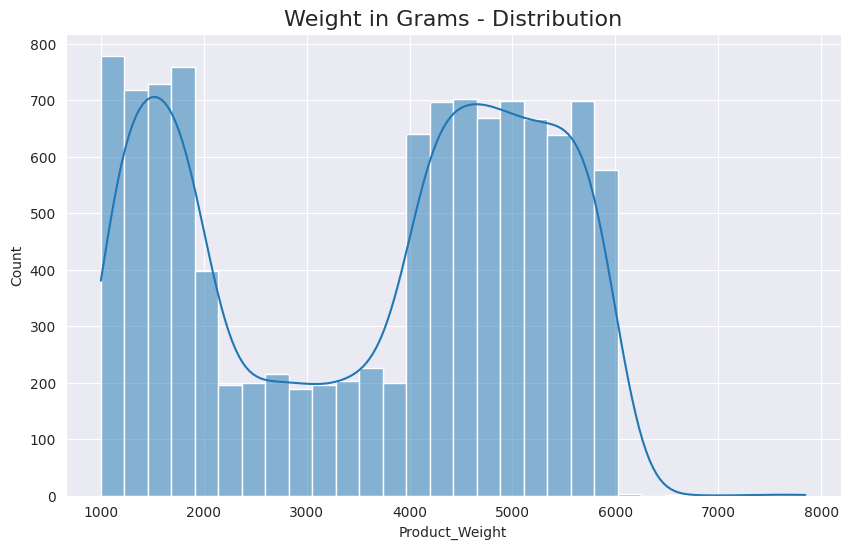

In [11]:
# Plotting numerical features
plot_numerical(data['Customer_Care_Calls'], 'Customer Care Calls')
plot_numerical(data['Customer_Rating'], 'Customer Rating')
plot_numerical(data['Product_Cost'], 'Cost of the Product')
plot_numerical(data['Prior_Purchases'], 'Prior Purchases')
plot_numerical(data['Discount_Offered'], 'Discount Offered')
plot_numerical(data['Product_Weight'], 'Weight in Grams')

In [18]:
import numpy as np

# Function to plot category on x-axis and target outcome rate on y-axis
def make_crosstab_ratio(feature, target, data, target_outcome=1):
    colormaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis',
                 'coolwarm', 'afmhot', 'gist_heat', 'hot', 'copper',
                 'jet', 'rainbow', 'seismic', 'twilight', 'twilight_shifted']
    random_index = np.random.randint(1, len(colormaps))
    selected_colormap = colormaps[random_index]

    category_ratios = {}
    for category in data[feature].unique():
        numerator = data[(data[target] == target_outcome) & (data[feature] == category)]
        denominator = data[data[feature] == category]
        try:
            ratio = 100 * (len(numerator) / len(denominator))
        except ZeroDivisionError:
            ratio = 0
        category_ratios[category] = ratio

    # Plotting the ratio
    sorted_ratios = dict(sorted(category_ratios.items(), reverse=True, key=lambda item: item[1]))
    categories = list(sorted_ratios.keys())
    ratios = list(sorted_ratios.values())

    plt.figure(figsize=(10, 6))
    sns.barplot(x=categories, y=ratios, palette=selected_colormap)
    plt.xlabel(feature)
    plt.ylabel(f'Percentage of {target_outcome} in {target}')
    plt.title(f'{target} Rate by {feature}')
    plt.ylim(min(ratios)-4, max(ratios)+2)
    plt.show()

    # Printing the ratios
    for category, ratio in sorted_ratios.items():
        print(f'{target} Rate for category {str(category).upper()} in feature {str(feature).upper()} is {ratio:.2f}%')

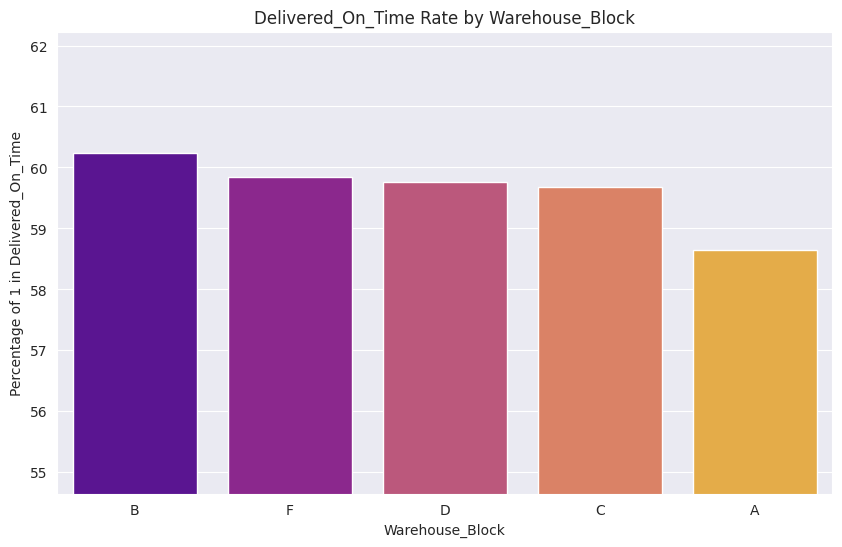

Delivered_On_Time Rate for category B in feature WAREHOUSE_BLOCK is 60.23%
Delivered_On_Time Rate for category F in feature WAREHOUSE_BLOCK is 59.85%
Delivered_On_Time Rate for category D in feature WAREHOUSE_BLOCK is 59.76%
Delivered_On_Time Rate for category C in feature WAREHOUSE_BLOCK is 59.68%
Delivered_On_Time Rate for category A in feature WAREHOUSE_BLOCK is 58.65%


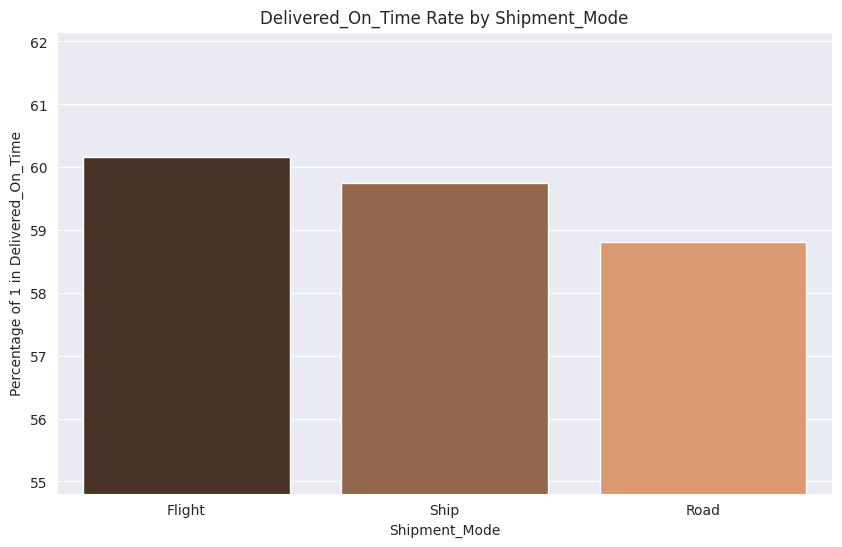

Delivered_On_Time Rate for category FLIGHT in feature SHIPMENT_MODE is 60.16%
Delivered_On_Time Rate for category SHIP in feature SHIPMENT_MODE is 59.76%
Delivered_On_Time Rate for category ROAD in feature SHIPMENT_MODE is 58.81%


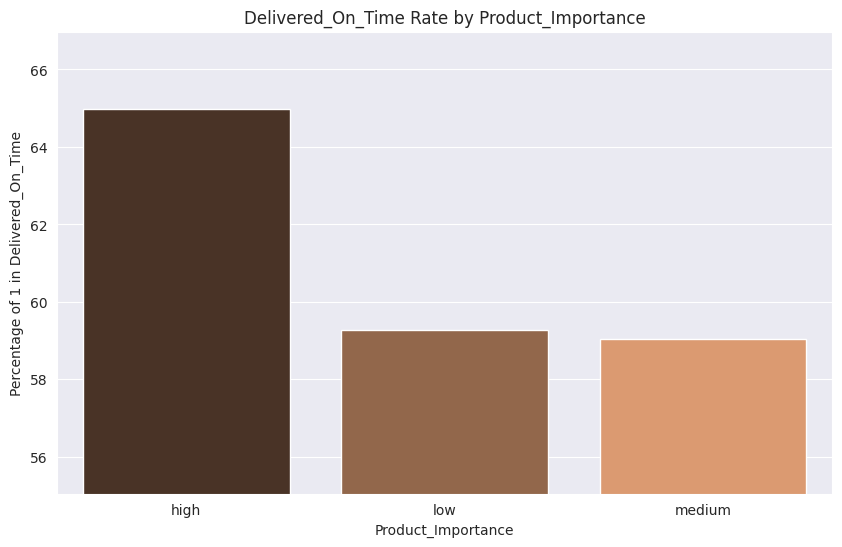

Delivered_On_Time Rate for category HIGH in feature PRODUCT_IMPORTANCE is 64.98%
Delivered_On_Time Rate for category LOW in feature PRODUCT_IMPORTANCE is 59.28%
Delivered_On_Time Rate for category MEDIUM in feature PRODUCT_IMPORTANCE is 59.05%


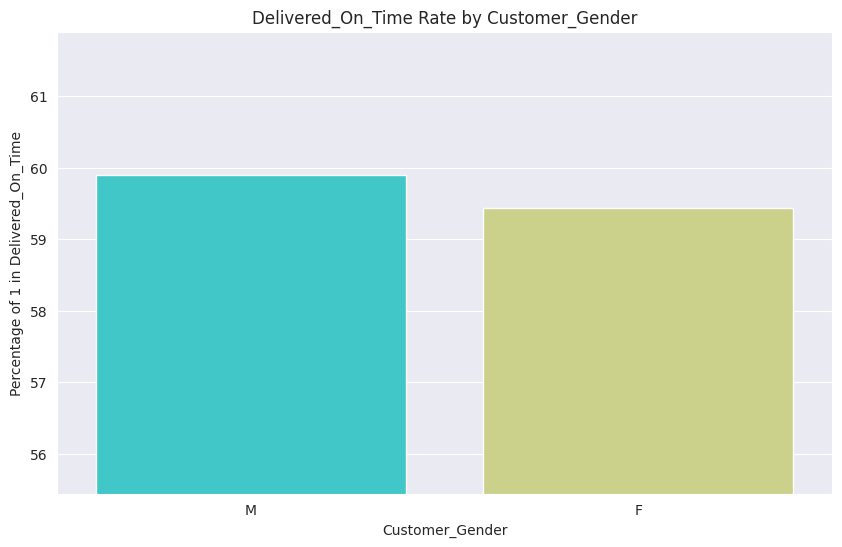

Delivered_On_Time Rate for category M in feature CUSTOMER_GENDER is 59.90%
Delivered_On_Time Rate for category F in feature CUSTOMER_GENDER is 59.44%


In [19]:
make_crosstab_ratio('Warehouse_Block', 'Delivered_On_Time', data)
make_crosstab_ratio('Shipment_Mode', 'Delivered_On_Time', data)
make_crosstab_ratio('Product_Importance', 'Delivered_On_Time', data)
make_crosstab_ratio('Customer_Gender', 'Delivered_On_Time', data)